In [2]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [3]:
def RMSE(trueVal, predictedVal): 
    return np.sqrt(((trueVal - predictedVal) ** 2).mean())

In [38]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mauna_loa')


x_train = np.vstack([x_train,x_valid])
y_train = np.vstack([y_train,y_valid])


U,S,V=np.linalg.svd(x_train)

S = S.reshape((S.shape[0], 1))
U = U[:,:S.shape[0]]

# print(S.shape)
# print(V.shape)
# print(x_train.shape)
# print(U.shape)
# print('test')
# print(V.shape)
# print(S.shape)
# print(U.shape)
# print(y_train.shape)

w = V @ np.linalg.inv(S) @  U.T @ y_train

ytrain = x_train*w
ytest = x_test*w



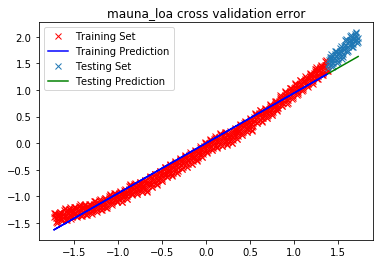

In [42]:
plt.plot(x_train,y_train,'rx',x_train,ytrain,'b',x_test,y_test,'x',x_test,ytest,'g')
plt.legend(['Training Set', 'Training Prediction', 'Testing Set', 'Testing Prediction'])
plt.title('mauna_loa cross validation error')
plt.show()



In [43]:
def RMSE(trueVal, predictedVal): 
    return np.sqrt(((trueVal - predictedVal) ** 2).mean())

In [45]:
ytrainError = RMSE(y_train, ytrain)
ytestError = RMSE(y_test, ytest)
    
print('Training Error:',ytrainError )
print('Testing Error:',ytestError )

Training Error: 0.129451302494341
Testing Error: 0.3072845135232775
